# Linear Regression

## This playground helps me to understand Semen's code even better.

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

# import the interactive visualizer
from ipywidgets import interactive
import matplotlib.pyplot as plt

In [2]:
# my data
# {"x": [0.1, 0.5, 1.3, 2.0, 3.5, 4.0, 5.1, 6.0, 7.2, 8.0],
#                   "y": [0.2, 0.6, 1.5, 2.1, 3.8, 4.5, 5.9, 6.8, 7.5, 8.2]}


df = pd.DataFrame({"x": [0.1, 1.3, 2, 2.9, 3.6, 5.1], "y": [0, 0, 1, 0, 1, 1]})

print(df.head())

     x  y
0  0.1  0
1  1.3  0
2  2.0  1
3  2.9  0
4  3.6  1


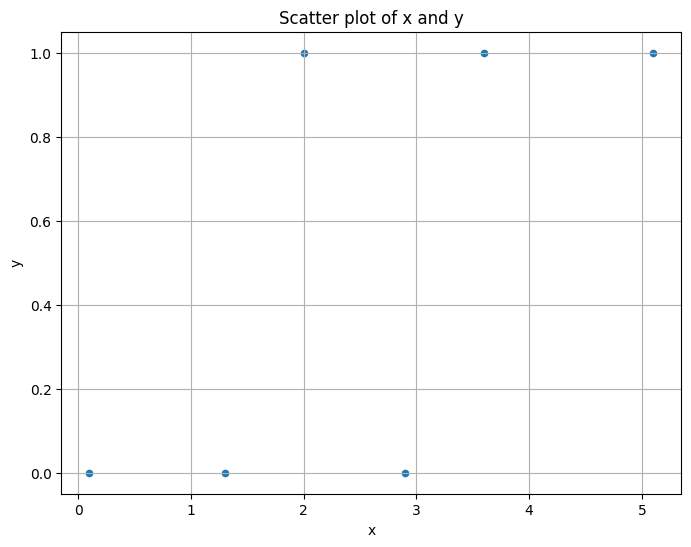

In [3]:
df.plot.scatter(x="x", y="y", grid=True, figsize=(8, 6), title="Scatter plot of x and y")
plt.show()

### Interesting function I leave it for now

In [4]:
def f(m, b):
    """Create a linear regression model with slope m and intercept b."""
    # Create the model
    model = LinearRegression()
    # Create the data
    X = df[["x"]]
    y = df["y"]
    # Fit the model
    model.fit(X, y)
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate metrics
    rmse_val = rmse(y, y_pred)
    mae_val = mae(y, y_pred)
    r2_val = r2_score(y, y_pred)
    
    # Print metrics
    print(f"RMSE: {rmse_val:.2f}")
    print(f"MAE: {mae_val:.2f}")
    print(f"R^2: {r2_val:.2f}")

### My intention is to add widgets to the plot

In [5]:
def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.grid()
    plt.plot(x, m*x + b, label="y = mx + b")
    plt.scatter(df["x"], df["y"], color="red", label="Data")
    plt.title("Linear Regression Model")
    plt.xlim(-1, 7)
    plt.ylim(-1, 3)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [6]:
# weights
m, b = 1, 1

# steps
n = 100

# Prediction
df['pred'] = m*df['x'] + b

# learning rate
nu = 0.1

# compute the error
for i in range(n):
    df["error"] = df["y"] - df["pred"]

    df['m_change'] = df['x'] * np.sign(df["error"])
    df['b_change'] = np.sign(df["error"])

    m += nu * df['m_change'].mean()
    b += nu * df['b_change'].mean()

    df['pred'] = m * df['x'] + b
    df['error'] = df['y'] - df['pred']
    df['error_abs'] = np.abs(df['error'])

    if i % 10 == 0:
        print(df['error_abs'].mean())


2.275
0.5035555555555556
0.3471111111111111
0.3872222222222224
0.35888888888888903
0.3588888888888888
0.3588888888888886
0.3588888888888884
0.3588888888888882
0.358888888888888


### Log the df and study what we got

In [7]:
print(df)

     x  y      pred     error  m_change  b_change  error_abs
0  0.1  0 -0.015667  0.015667       0.1       1.0   0.015667
1  1.3  0  0.196333 -0.196333      -1.3      -1.0   0.196333
2  2.0  1  0.320000  0.680000       2.0       1.0   0.680000
3  2.9  0  0.479000 -0.479000      -2.9      -1.0   0.479000
4  3.6  1  0.602667  0.397333       3.6       1.0   0.397333
5  5.1  1  0.867667  0.132333      -5.1      -1.0   0.132333


## Explanation about how ROC AUC works

### Formula

```
df['y_pred'] = df['pred'] > pred_value
```

where `pred_value` is taken first:

-0.015667, then 0.196333 and etc 

Each time we update the `y_pred`

This is how `ROC AUC` works

In [ ]:
df['y_pred'] = df['pred'] > -0.015667
print(df[['x', 'y', 'pred', 'y_pred']])

     x  y      pred  y_pred
0  0.1  0 -0.015667    True
1  1.3  0  0.196333    True
2  2.0  1  0.320000    True
3  2.9  0  0.479000    True
4  3.6  1  0.602667    True
5  5.1  1  0.867667    True


In [8]:
# print the roc auc score
print("ROC AUC Score:", roc_auc_score(df["y"], df["pred"]))

ROC AUC Score: 0.888888888888889


In [16]:
ls = LogisticRegression()
ls.fit(df[["x"]], df["y"])
print(ls)

LogisticRegression()


In [17]:
print(ls.predict_proba(df[["x"]]))

[[0.86302186 0.13697814]
 [0.71353003 0.28646997]
 [0.59175887 0.40824113]
 [0.41951135 0.58048865]
 [0.29606037 0.70393963]
 [0.11648312 0.88351688]]


### Our predict vs what actual is

#### Observation

We see that our `pred` is similar to `lr_pred`: they both increase `x` grows


#### Principle

recency frequency monetary = rfm

In [19]:
df['lr_pred'] = ls.predict_proba(df[["x"]])[:, 1]
print(df[['x', 'y', 'pred', 'lr_pred']])

     x  y      pred   lr_pred
0  0.1  0 -0.015667  0.136978
1  1.3  0  0.196333  0.286470
2  2.0  1  0.320000  0.408241
3  2.9  0  0.479000  0.580489
4  3.6  1  0.602667  0.703940
5  5.1  1  0.867667  0.883517


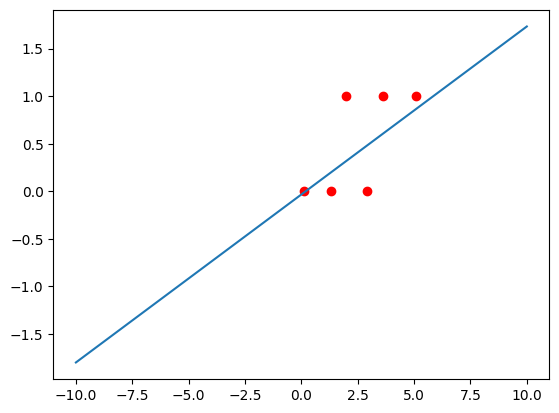

In [21]:
x = np.linspace(-10, 10, num=1000)
plt.plot(x, m * x + b, label="y = mx + b")
plt.scatter(df["x"], df["y"], color="red", label="Data")

In [24]:
X = df[["x"]]
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:,1]

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC:", roc_auc)

ROC AUC: nan


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
